EXPLORATION

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
music_health_df = pd.read_csv("Music & Mental Health.csv")

In [50]:
music_health_df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [51]:
music_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

I can see that there are some missing values, that I will have to deal with in a second moment. 

I don't like the names of the columns with spaces, I replace the spaces with _. I make also further changes, to simplify the names of the columns.

In [52]:
music_health_df.columns = [col.replace(" ", "_").replace("Frequency", "Freq").replace("[","").replace("]","") for col in music_health_df.columns]

I remove the first column, because it is irrelevant.

In [53]:
music_health_df.drop(columns = "Timestamp", axis = 1, inplace = True)

I decide to remove also other columns, that are not useful for the study of the dataset.

In [54]:
music_health_df.Permissions.unique() #column full of a unique value

array(['I understand.'], dtype=object)

In [55]:
delate_col = ["Permissions", "BPM", "Foreign_languages", "Primary_streaming_service"] #list of columns to delate
for col in delate_col:
    music_health_df.drop([col], axis = 1, inplace = True)

In [56]:
music_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    735 non-null    float64
 1   Hours_per_day          736 non-null    float64
 2   While_working          733 non-null    object 
 3   Instrumentalist        732 non-null    object 
 4   Composer               735 non-null    object 
 5   Fav_genre              736 non-null    object 
 6   Exploratory            736 non-null    object 
 7   Freq_Classical         736 non-null    object 
 8   Freq_Country           736 non-null    object 
 9   Freq_EDM               736 non-null    object 
 10  Freq_Folk              736 non-null    object 
 11  Freq_Gospel            736 non-null    object 
 12  Freq_Hip_hop           736 non-null    object 
 13  Freq_Jazz              736 non-null    object 
 14  Freq_K_pop             736 non-null    object 
 15  Freq_L

In [57]:
backup_dataset = music_health_df.copy() #I create a backup copy of the dataset

Now I deal with the missing values:

In [58]:
music_health_df[music_health_df["Music_effects"].isnull()].index

Int64Index([0, 1, 161, 168, 338, 441, 532, 561], dtype='int64')

In [59]:
music_health_df.drop(music_health_df[music_health_df["Music_effects"].isnull()].index, inplace = True) 
#I delete the rows that don't have a value in the last column, because they are irrelevant: I won't be able to use them for my study.

In [60]:
print(music_health_df[music_health_df["Age"].isnull()].index)
print(music_health_df[music_health_df["While_working"].isnull()].index)
print(music_health_df[music_health_df["Instrumentalist"].isnull()].index)
#position of the null vales for these columns

Int64Index([12], dtype='int64')
Int64Index([57, 426], dtype='int64')
Int64Index([223, 408, 572], dtype='int64')


In [61]:
null_col = ["While_working", "Instrumentalist"] #I delate the null values in these columns
for col in null_col:
    music_health_df.drop(music_health_df[music_health_df[col].isnull()].index, inplace = True)

In [62]:
#I replace the remaining missing value in the column "Age" with the mean of this column (rounded)
music_health_df["Age"].fillna(round(music_health_df["Age"].mean()), inplace = True)

In [63]:
music_health_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 2 to 735
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    723 non-null    float64
 1   Hours_per_day          723 non-null    float64
 2   While_working          723 non-null    object 
 3   Instrumentalist        723 non-null    object 
 4   Composer               723 non-null    object 
 5   Fav_genre              723 non-null    object 
 6   Exploratory            723 non-null    object 
 7   Freq_Classical         723 non-null    object 
 8   Freq_Country           723 non-null    object 
 9   Freq_EDM               723 non-null    object 
 10  Freq_Folk              723 non-null    object 
 11  Freq_Gospel            723 non-null    object 
 12  Freq_Hip_hop           723 non-null    object 
 13  Freq_Jazz              723 non-null    object 
 14  Freq_K_pop             723 non-null    object 
 15  Freq_L

Now I don't have missing value.

In [64]:
backup_dataset2 = music_health_df.copy()

Since, a lot of columns have similar values, representing the frequences of listening of the different genres, I substitute the object values with numerical values.

In [65]:
music_health_df.Freq_Classical.unique()

array(['Never', 'Sometimes', 'Rarely', 'Very frequently'], dtype=object)

In [66]:
for i in music_health_df.columns[7:23]:
  #each label correspond to a number
  music_health_df.loc[music_health_df[i] == music_health_df[i].unique()[0], i] = 0
  music_health_df.loc[music_health_df[i] == music_health_df[i].unique()[1], i] = 2
  music_health_df.loc[music_health_df[i] == music_health_df[i].unique()[2], i] = 1
  music_health_df.loc[music_health_df[i] == music_health_df[i].unique()[3], i] = 3

In [67]:
music_health_df[music_health_df.columns[7:23]] = music_health_df[music_health_df.columns[7:23]].astype(int)
#transforming the column into an integer column

I repeat the same process for the columns with values "Yes" and "No" and for the column Music Effects.

In [68]:
for i in music_health_df.columns[2:5]:
  music_health_df.loc[music_health_df[i] == "Yes", i] = 1
  music_health_df.loc[music_health_df[i] == "No", i] = 0
music_health_df[music_health_df.columns[2:5]] = music_health_df[music_health_df.columns[2:5]].astype(int)

In [69]:
replace_dict = {"No": 0, "Yes": 1}
music_health_df.Exploratory.replace(replace_dict, inplace = True)
music_health_df["Exploratory"] = music_health_df["Exploratory"].astype(int)

In [70]:
music_health_df.Music_effects.unique()

array(['No effect', 'Improve', 'Worsen'], dtype=object)

In [71]:
replace_dict2 = {"No effect": 0, "Improve": 1, "Worsen": 2}
music_health_df.Music_effects.replace(replace_dict2, inplace = True)
music_health_df["Music_effects"] = music_health_df["Music_effects"].astype(int)

In [72]:
#transforming to integers also the float columns (because they have integer values inside)
music_health_df[music_health_df.columns[0:2]] = music_health_df[music_health_df.columns[0:2]].astype(int)
music_health_df[music_health_df.columns[23:27]] = music_health_df[music_health_df.columns[23:27]].astype(int)

In [73]:
music_health_df.index = [x for x in range(len(music_health_df.index))]
#replacing the indexes of the rows of the dataset, starting from 0

In [74]:
music_health_df.head()

,Age,Hours_per_day,While_working,Instrumentalist,Composer,Fav_genre,Exploratory,Freq_Classical,Freq_Country,Freq_EDM,...,Freq_Pop,Freq_R&B,Freq_Rap,Freq_Rock,Freq_Video_game_music,Anxiety,Depression,Insomnia,OCD,Music_effects
0,18,4,0,0,0,Video game music,0,0,0,0,...,0,0,0,0,0,7,7,10,2,0
1,61,2,1,0,1,Jazz,1,2,0,2,...,2,2,2,2,2,9,7,3,3,1
2,18,4,1,0,0,R&B,1,0,0,1,...,2,1,1,2,1,7,2,5,9,1
3,18,5,1,1,1,Jazz,1,1,2,2,...,1,1,1,1,2,8,8,7,7,1
4,18,3,1,1,0,Video game music,1,2,0,1,...,0,3,2,2,3,4,8,6,0,1


In [75]:
music_health_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 0 to 722
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    723 non-null    int32 
 1   Hours_per_day          723 non-null    int32 
 2   While_working          723 non-null    int32 
 3   Instrumentalist        723 non-null    int32 
 4   Composer               723 non-null    int32 
 5   Fav_genre              723 non-null    object
 6   Exploratory            723 non-null    int32 
 7   Freq_Classical         723 non-null    int32 
 8   Freq_Country           723 non-null    int32 
 9   Freq_EDM               723 non-null    int32 
 10  Freq_Folk              723 non-null    int32 
 11  Freq_Gospel            723 non-null    int32 
 12  Freq_Hip_hop           723 non-null    int32 
 13  Freq_Jazz              723 non-null    int32 
 14  Freq_K_pop             723 non-null    int32 
 15  Freq_Latin             

In [76]:
music_health_df.describe()

,Age,Hours_per_day,While_working,Instrumentalist,Composer,Exploratory,Freq_Classical,Freq_Country,Freq_EDM,Freq_Folk,...,Freq_Pop,Freq_R&B,Freq_Rap,Freq_Rock,Freq_Video_game_music,Anxiety,Depression,Insomnia,OCD,Music_effects
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,...,723.000000,723.00000,723.000000,723.000000,723.00000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,25.149378,3.542185,0.788382,0.320885,0.171508,0.716459,1.334716,1.323651,1.691563,1.116183,...,1.311203,1.51314,1.504841,1.580913,1.66390,5.838174,4.802213,3.727524,2.645920,0.792531
std,11.928682,3.036587,0.408738,0.467140,0.377213,0.451029,0.990955,1.335777,0.926838,1.051473,...,0.867207,1.20285,1.169045,1.048688,1.02282,2.786509,3.016280,3.082279,2.844871,0.460157
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.00000,0.000000,1.000000,1.00000,4.000000,2.000000,1.000000,0.000000,1.000000
50%,21.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,2.00000,2.000000,1.000000,2.00000,6.000000,5.000000,3.000000,2.000000,1.000000
75%,28.000000,5.000000,1.000000,1.000000,0.000000,1.000000,2.000000,3.000000,2.000000,2.000000,...,2.000000,3.00000,3.000000,3.000000,3.00000,8.000000,7.000000,6.000000,5.000000,1.000000
max,89.000000,24.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.00000,3.000000,3.000000,3.00000,10.000000,10.000000,10.000000,10.000000,2.000000


Now I study the correlation between the columns of the dataset, removing the column "Fav_genre" that is non numerical.

In [77]:
corr_matrix = music_health_df.drop("Fav_genre", axis = 1).corr()
corr_matrix

,Age,Hours_per_day,While_working,Instrumentalist,Composer,Exploratory,Freq_Classical,Freq_Country,Freq_EDM,Freq_Folk,...,Freq_Pop,Freq_R&B,Freq_Rap,Freq_Rock,Freq_Video_game_music,Anxiety,Depression,Insomnia,OCD,Music_effects
Age,1.000000,-0.039061,-0.071911,-0.123198,-0.027556,-0.179529,0.097468,0.073454,0.033989,0.102084,...,0.046780,0.087608,0.035902,0.060593,0.052594,-0.183197,-0.114584,0.008228,-0.131003,-0.075848
Hours_per_day,-0.039061,1.000000,0.287855,-0.020297,0.137567,0.137684,-0.029094,0.022239,-0.051718,0.090426,...,-0.090987,0.012077,-0.032734,-0.082516,0.062767,0.046722,0.099280,0.136558,0.113802,0.003299
While_working,-0.071911,0.287855,1.000000,0.080485,0.047078,0.139879,0.055436,0.087566,-0.059195,0.057286,...,-0.060120,0.012706,-0.028288,-0.032701,0.001911,0.036775,0.055878,0.034423,0.085553,0.127082
Instrumentalist,-0.123198,-0.020297,0.080485,1.000000,0.402519,0.070874,0.252363,0.026442,0.004982,-0.008331,...,0.012995,-0.076532,-0.099224,0.026091,0.078195,0.031435,0.006769,0.030988,0.019955,0.078175
Composer,-0.027556,0.137567,0.047078,0.402519,1.000000,0.098986,0.094467,0.073852,-0.002986,0.075405,...,0.027143,0.016394,-0.067843,0.006886,0.002428,0.004041,0.054202,0.095047,0.015367,0.069629
Exploratory,-0.179529,0.137684,0.139879,0.070874,0.098986,1.000000,0.060790,0.067470,-0.060399,0.113367,...,-0.050295,0.117931,-0.064377,0.014897,0.069353,0.019645,0.059511,0.056931,0.029591,0.116578
Freq_Classical,0.097468,-0.029094,0.055436,0.252363,0.094467,0.060790,1.000000,0.112667,0.034144,0.118150,...,0.026897,-0.004857,-0.057593,0.007223,-0.050101,-0.056097,-0.010257,0.071619,-0.008997,-0.029744
Freq_Country,0.073454,0.022239,0.087566,0.026442,0.073852,0.067470,0.112667,1.000000,-0.000924,0.265083,...,-0.009352,0.143893,0.022943,0.005998,-0.025701,0.049069,0.009722,0.021785,0.059356,0.007994
Freq_EDM,0.033989,-0.051718,-0.059195,0.004982,-0.002986,-0.060399,0.034144,-0.000924,1.000000,0.039664,...,-0.019992,-0.005677,-0.008207,0.005050,0.001534,-0.030079,-0.049101,-0.044489,-0.033597,-0.062565
Freq_Folk,0.102084,0.090426,0.057286,-0.008331,0.075405,0.113367,0.118150,0.265083,0.039664,1.000000,...,-0.073124,0.126918,0.026584,0.006536,-0.046063,0.078279,0.082370,0.077731,0.022569,-0.015952


<AxesSubplot: >

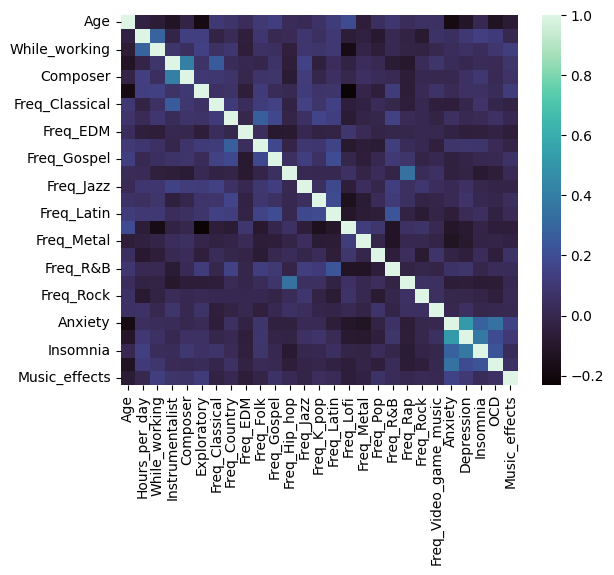

In [78]:
sns.heatmap(corr_matrix, cmap = sns.color_palette("mako", as_cmap=True))

I notice that the values of correlation are generally very low, suggesting that there is not any strong linear correlation between the couples of columns. However, I search for the maximum positive and negative values of correlation.

In [79]:
corr_sequence = corr_matrix.unstack()
sorted_corr_sequence = corr_sequence.sort_values(kind = "quicksort") #sorting the values, I can find the minimum and the maximum
sorted_corr_sequence[0:1], sorted_corr_sequence[-29:-28] 
#the maximum value is the maximum value different from 1 (because 1 is given by the elements in the diagonal)

(Exploratory  Freq_Lofi   -0.231638
 dtype: float64,
 Depression  Anxiety    0.520878
 dtype: float64)

PLOTS

Firstly, I create histograms corresponding to the frequence of listening to music.

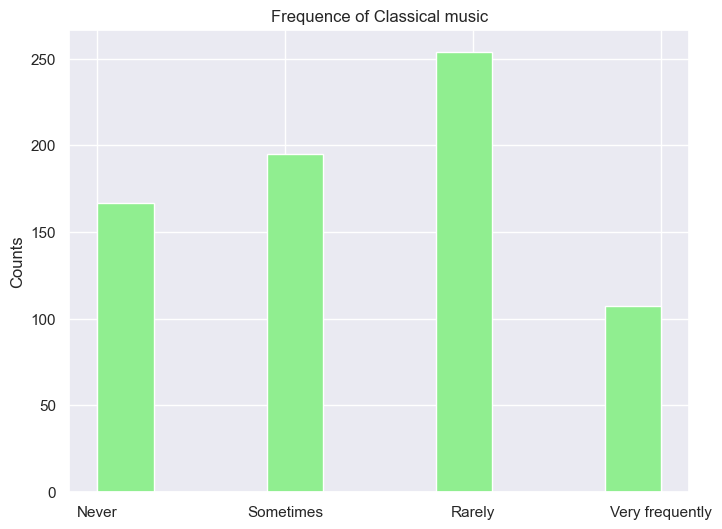

In [162]:
#an histogram for the columns corresponding to the listening frequence of a music genre
plt.figure(figsize = (8,6))
plt.hist(backup_dataset2.Freq_Classical, color = "lightgreen")
plt.ylabel("Counts")
plt.title("Frequence of Classical music")
plt.show()
#The idea is to use this implementation to create a selectbox in streamlit and for each choice print the corresponding graph

Then, I use pie charts to compare the frequencies of listening to different genres of music.

In [81]:
#a list with all the values that correspond to the number of people for each listening frequence
frequences = []
for col in music_health_df.columns[7:23]:
    freq = dict(backup_dataset2[col].value_counts())
    #a dictionary for every music genre
    frequences.append(freq) #the list is a list of dictionaries
rarely_list = [frequences[i]["Rarely"] for i in range(len(frequences))] #list of all the values corresponding to the key "Rarely"
never_list = [frequences[i]["Never"] for i in range(len(frequences))]
sometimes_list = [frequences[i]["Sometimes"] for i in range(len(frequences))]
very_frequently_list = [frequences[i]["Very frequently"] for i in range(len(frequences))]

In [82]:
frequences

[{'Rarely': 254, 'Sometimes': 195, 'Never': 167, 'Very frequently': 107},
 {'Never': 335, 'Rarely': 230, 'Sometimes': 109, 'Very frequently': 49},
 {'Never': 298, 'Rarely': 192, 'Sometimes': 145, 'Very frequently': 88},
 {'Never': 286, 'Rarely': 218, 'Sometimes': 143, 'Very frequently': 76},
 {'Never': 526, 'Rarely': 133, 'Sometimes': 50, 'Very frequently': 14},
 {'Sometimes': 214, 'Rarely': 211, 'Never': 176, 'Very frequently': 122},
 {'Never': 255, 'Rarely': 244, 'Sometimes': 172, 'Very frequently': 52},
 {'Never': 411, 'Rarely': 174, 'Very frequently': 71, 'Sometimes': 67},
 {'Never': 436, 'Rarely': 171, 'Sometimes': 85, 'Very frequently': 31},
 {'Never': 275, 'Rarely': 206, 'Sometimes': 158, 'Very frequently': 84},
 {'Never': 257, 'Rarely': 189, 'Very frequently': 146, 'Sometimes': 131},
 {'Very frequently': 272, 'Sometimes': 257, 'Rarely': 140, 'Never': 54},
 {'Never': 223, 'Rarely': 209, 'Sometimes': 176, 'Very frequently': 115},
 {'Rarely': 212, 'Never': 195, 'Sometimes': 191, '

In [83]:
rarely_list

[254, 230, 192, 218, 133, 211, 244, 174, 171, 206, 189, 140, 209, 212, 95, 195]

In [84]:
colors = ["plum", "lemonchiffon", "c", "tan", "lightblue", "Linen", "Gray", "lightskyblue", "lightgrey", "LightSeaGreen", "skyblue", 
          "pink", "Thistle", "y", "lightsalmon", "lightcyan"] #list of colors for the pie charts

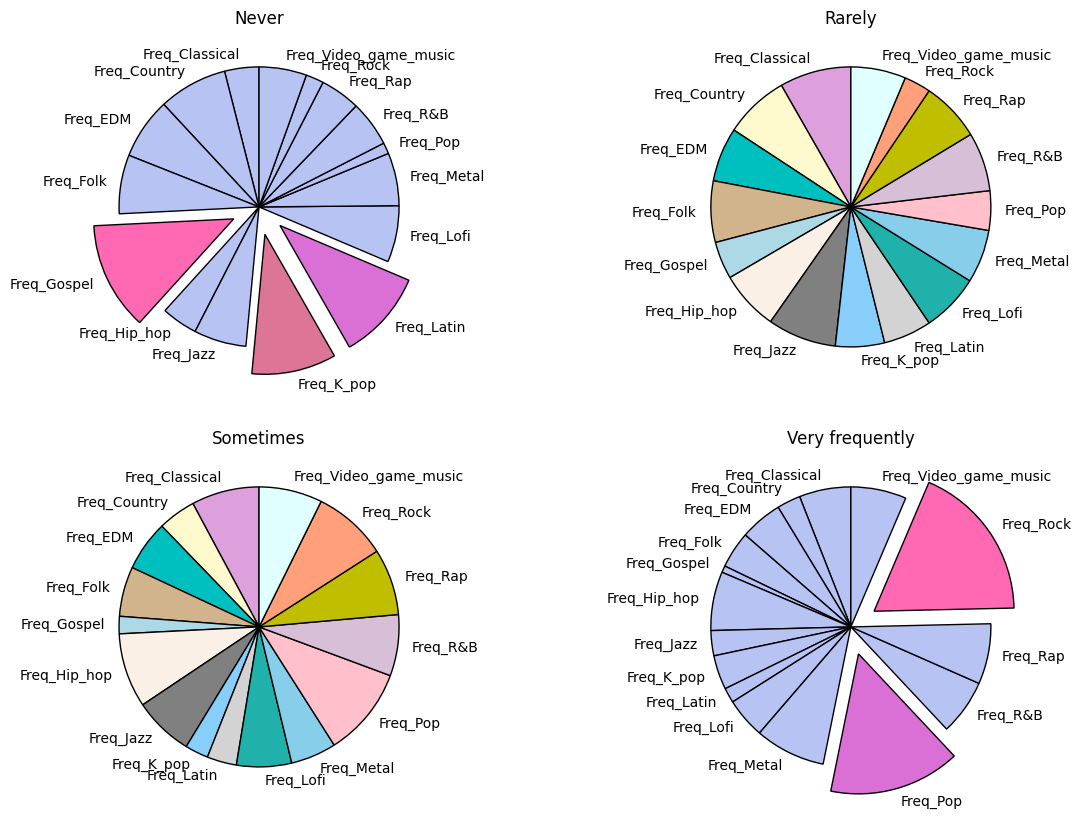

In [85]:
#creation of the pie charts
fig,axs = plt.subplots(2, 2, figsize = (14,10)) 
axs[0,0].pie(never_list, startangle = 90, labels = music_health_df.columns[7:23], wedgeprops = { "linewidth" : 1, "edgecolor" : "black" }, 
colors = ["#B7C3F3", "#B7C3F3", "#B7C3F3", "#B7C3F3", "hotpink", "#B7C3F3", "#B7C3F3", "#DD7596", "orchid", "#B7C3F3", "#B7C3F3", "#B7C3F3", "#B7C3F3", "#B7C3F3", "#B7C3F3", "#B7C3F3"], 
explode = [0, 0, 0, 0, 0.2, 0, 0, 0.2, 0.2, 0, 0, 0, 0, 0, 0, 0])
axs[0,0].title.set_text("Never")
axs[0,1].pie(rarely_list, startangle = 90, labels = music_health_df.columns[7:23], wedgeprops = { "linewidth" : 1, "edgecolor" : "black" }, colors = colors)
axs[0,1].title.set_text("Rarely")
axs[1,0].pie(sometimes_list, startangle = 90, labels = music_health_df.columns[7:23], wedgeprops = { "linewidth" : 1, "edgecolor" : "black" }, colors = colors)
axs[1,0].title.set_text("Sometimes")
axs[1,1].pie(very_frequently_list, startangle = 90, labels = music_health_df.columns[7:23], colors = ["#B7C3F3", "#B7C3F3", "#B7C3F3", "#B7C3F3", "#B7C3F3", 
"#B7C3F3", "#B7C3F3", "#B7C3F3", "#B7C3F3", "#B7C3F3", "#B7C3F3", "orchid", "#B7C3F3", "#B7C3F3", "hotpink", "#B7C3F3"], 
wedgeprops = { "linewidth" : 1, "edgecolor" : "black" }, explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2, 0, 0, 0.2, 0])
axs[1,1].title.set_text("Very frequently")
plt.show()

The following graph represents the music effects frequence related to age.

In [86]:
#creation of masks to create groups according to the age of the people
mask_1 = (music_health_df["Age"] < 20) | (music_health_df["Age"] == 20)
mask_2 = (music_health_df["Age"] > 20) & (music_health_df["Age"] < 40) | (music_health_df["Age"] == 40)
mask_3 = (music_health_df["Age"] > 40) & (music_health_df["Age"] < 60) | (music_health_df["Age"] == 60)
mask_4 = (music_health_df["Age"] > 60)

In [87]:
#creation of a new column that represents the age group of each row
music_health_df.loc[mask_1,"Age_group"] = "under 20"
music_health_df.loc[mask_2, "Age_group"] = "21-40"
music_health_df.loc[mask_3, "Age_group"] = "41-60"
music_health_df.loc[mask_4, "Age_group"] = "over 60"


In [88]:
#data that I want to represent
x = [music_health_df.loc[music_health_df["Age_group"] == "under 20","Music_effects"], music_health_df.loc[music_health_df["Age_group"] == "21-40","Music_effects"],
music_health_df.loc[music_health_df["Age_group"] == "41-60","Music_effects"], music_health_df.loc[music_health_df["Age_group"] == "over 60","Music_effects"]]

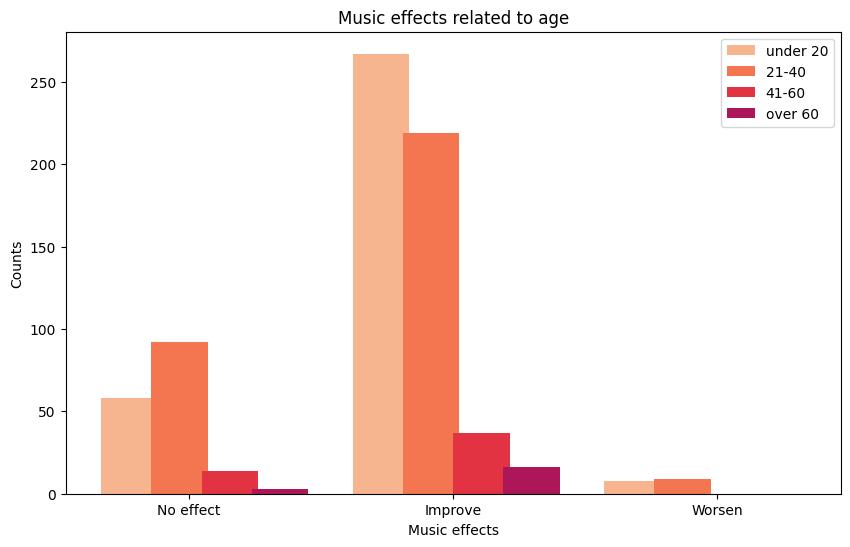

In [89]:
plt.figure(figsize = (10,6))
plt.hist(x, bins = 3, label = ["under 20", "21-40", "41-60", "over 60"], width = 0.15, color = sns.color_palette("rocket")[-1:-5:-1])
plt.xticks([0.3,1,1.7], ["No effect", "Improve", "Worsen"])
plt.xlabel("Music effects")
plt.ylabel("Counts")
plt.title("Music effects related to age")
plt.legend()
plt.show()

In [90]:
music_health_df["Age_group"].value_counts() #evaluation of the frequence of each value of age group

under 20    333
21-40       320
41-60        51
over 60      19
Name: Age_group, dtype: int64

Creation of a set of histograms, showing the frequence of various levels of Anxiety, Depression, Insomnia and OCD, 
with a differentiation according to the effects of music on the patients.

In [91]:
music_health_df["Music_effects"].value_counts()

1    539
0    167
2     17
Name: Music_effects, dtype: int64

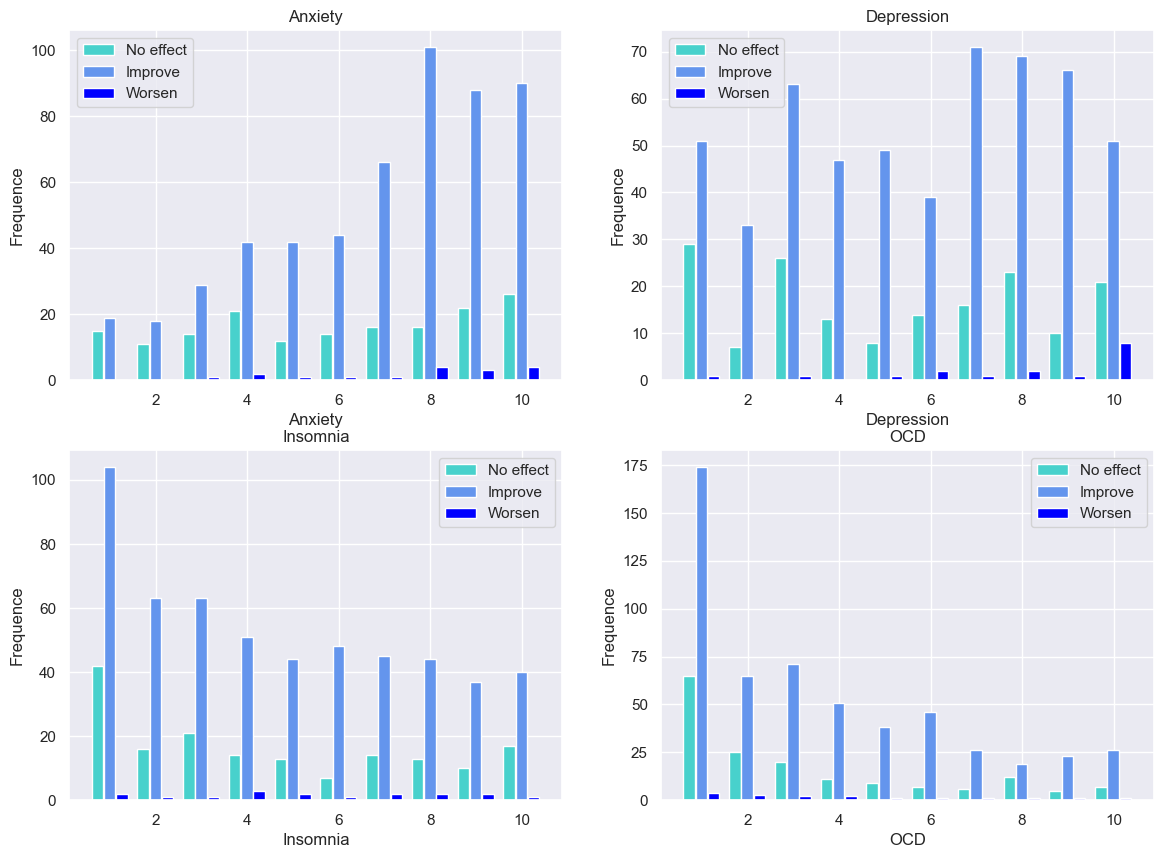

In [115]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize = (14,10))
for i in range(0,2):
    for j in range(2,4):
        if i == 0: #creation of the graphs in the first row
            axs[i,j-2].hist([music_health_df.loc[music_health_df[music_health_df.columns[-2]] == 0,music_health_df.columns[23:27][i+j-2]], music_health_df.loc[music_health_df[music_health_df.columns[-2]] == 1,music_health_df.columns[23:27][i+j-2]], 
            music_health_df.loc[music_health_df[music_health_df.columns[-2]] == 2,music_health_df.columns[23:27][i+j-2]]], color = ["mediumturquoise", "cornflowerblue", "blue"], label = ["No effect", "Improve", "Worsen"], width=0.25, align = "right")
            axs[i,j-2].title.set_text(music_health_df.columns[23:27][i+j-2])
            axs[i,j-2].set_xlabel(music_health_df.columns[23:27][i+j-2])
            axs[i,j-2].set_ylabel("Frequence")
            axs[i,j-2].legend()
        else: #creation of the graphs in the second row
            axs[i,j-2].hist([music_health_df.loc[music_health_df[music_health_df.columns[-2]] == 0,music_health_df.columns[23:27][i+j-1]], music_health_df.loc[music_health_df[music_health_df.columns[-2]] == 1,music_health_df.columns[23:27][i+j-1]], 
            music_health_df.loc[music_health_df[music_health_df.columns[-2]] == 2,music_health_df.columns[23:27][i+j-1]]], color = ["mediumturquoise", "cornflowerblue", "blue"], label = ["No effect", "Improve", "Worsen"], width=0.25, align = "right")
            axs[i,j-2].title.set_text(music_health_df.columns[23:27][i+j-1])
            axs[i,j-2].set_xlabel(music_health_df.columns[23:27][i+j-1])
            axs[i,j-2].set_ylabel("Frequence")
            axs[i,j-2].legend()
plt.show()

Now I analyze the relationship between anxiety and depression, divided by age group.

In [93]:
music_health_df["Age_group"].unique() 

array(['under 20', 'over 60', '21-40', '41-60'], dtype=object)

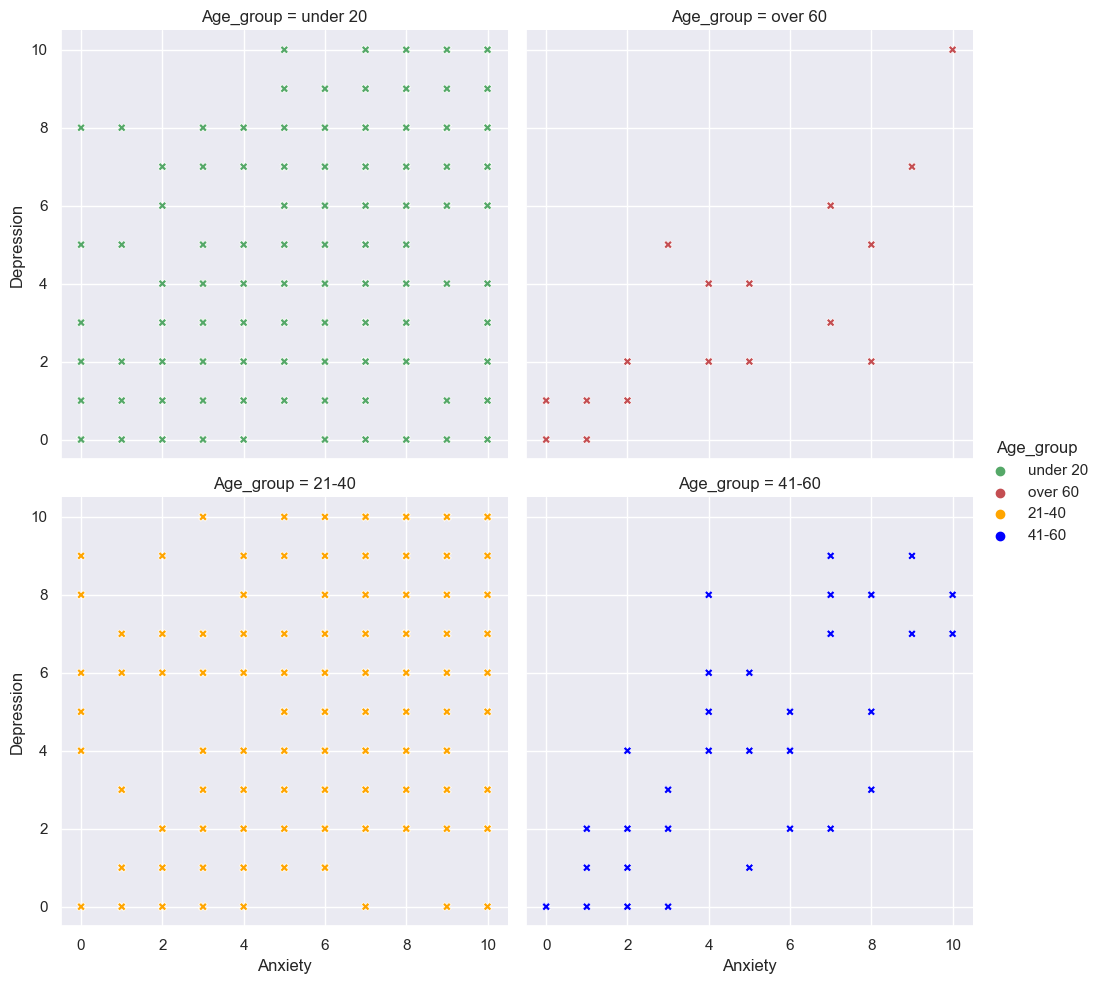

In [118]:
sns.relplot(data = music_health_df, x="Anxiety", y="Depression", hue = "Age_group", col = "Age_group", kind="scatter", 
col_wrap = 2, palette = ["g", "r", "orange", "blue"], marker = "X")
plt.show()

I investigate the linear relationship between anxiety and depression:

In [101]:
from sklearn.model_selection import train_test_split

#creation of test and train subsets of the data
x = music_health_df.loc[music_health_df["Age_group"] == "over 60","Anxiety"]
y = music_health_df.loc[music_health_df["Age_group"] == "over 60","Depression"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [102]:
def straight_line(x, m, q): #function that creates a straight line
  return (m*x)+q

In [103]:
from sklearn.linear_model import LinearRegression

x_train = np.array(x_train).reshape(-1,1) #reshape for applying linear regression
y_train = np.array(y_train).reshape(-1,1) 
x_test = np.array(x_test).reshape(-1,1)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

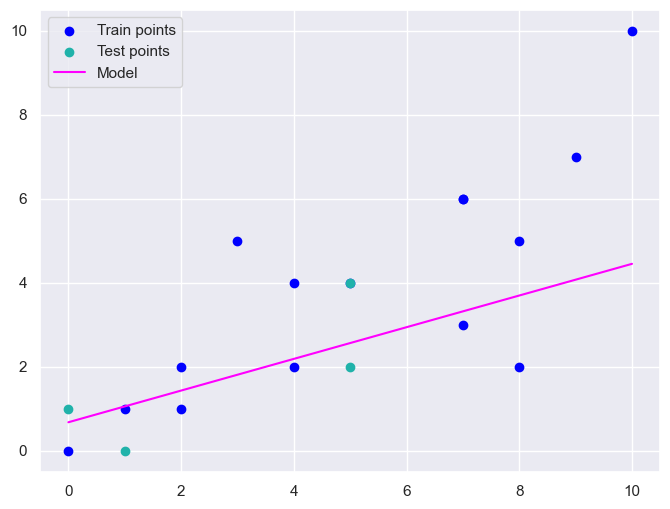

In [104]:
#representation of the linear regression
plt.figure(figsize = (8,6))
plt.scatter(x_train, y_train, c = "blue", label = "Train points")
plt.scatter(x_test, y_test, c = "LightSeaGreen", label = "Test points") #represent train and test points with different colors
x = np.arange(11)
line = straight_line(x, model.intercept_[0], model.coef_[0]) #straight line with the intercept and the coefficient obtained with the regression
plt.plot(line, c = "Magenta", label = "Model")
plt.legend()
plt.show()

In [105]:
model.intercept_, model.coef_ #intercept and coefficient found with the linear regression

(array([0.37721022]), array([[0.67976424]]))

In [106]:
import sklearn.metrics as metrics

metrics.mean_squared_error(y_pred, y_test) #mean squared error associated with the result

1.177377924278507

Now I wanto to create a subset of my dataset and use the groupby function to create an addictional graph.

In [107]:
new_dataset = music_health_df.copy()

In [108]:
#creation of a subset of the dataset, with only the columns I'm interested in
new_dataset.drop(music_health_df.columns[7:27], axis = 1, inplace = True)
new_dataset.drop(music_health_df.columns[-1], axis = 1, inplace = True)
new_dataset.drop(music_health_df.columns[5], axis = 1, inplace = True)
new_dataset.head() 

,Age,Hours_per_day,While_working,Instrumentalist,Composer,Exploratory,Music_effects
0,18,4,0,0,0,0,0
1,61,2,1,0,1,1,1
2,18,4,1,0,0,1,1
3,18,5,1,1,1,1,1
4,18,3,1,1,0,1,1


In [109]:
data_groupby_effects_mean  = new_dataset.groupby(["Music_effects"]).mean() #group the new dataset by Music effects and make the mean
data_groupby_effects_mean["Music_effects"] = [0, 1, 2]
data_groupby_effects_mean

,Age,Hours_per_day,While_working,Instrumentalist,Composer,Exploratory,Music_effects
Music_effects,,,,,,,
0,26.694611,3.437126,0.670659,0.239521,0.113772,0.598802,0
1,24.749536,3.601113,0.829314,0.348794,0.191095,0.756957,1
2,22.647059,2.705882,0.647059,0.235294,0.117647,0.588235,2


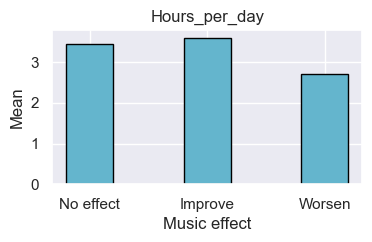

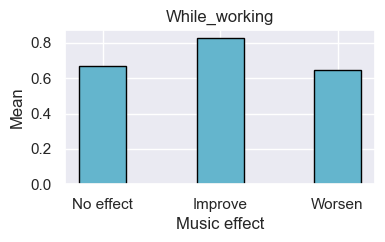

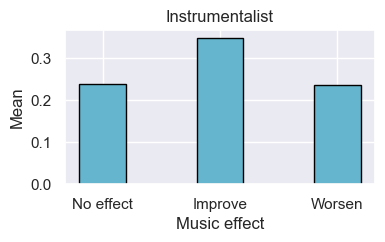

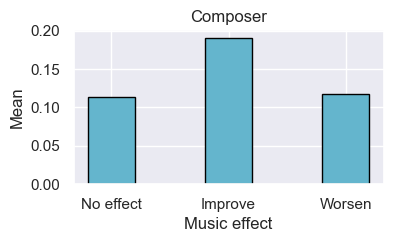

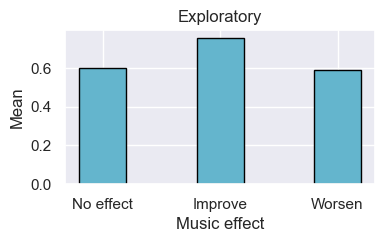

In [112]:
#creation of bar chart for every column from 1 to 6 (representing the mean of each column grouped by music effects)
for i in data_groupby_effects_mean.columns[1:6]:
    plt.figure(figsize = (4,2))
    plt.bar(data_groupby_effects_mean["Music_effects"].index, data_groupby_effects_mean[i], width = 0.4, color = "c", edgecolor = "black")
    plt.xlabel("Music effect")
    plt.ylabel("Mean")
    plt.title(i)
    plt.xticks([0, 1, 2], ["No effect", "Improve", "Worsen"])
    plt.show()

Random Forest Classifier for Music effects

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [120]:
y_data = music_health_df["Music_effects"]
x_data = music_health_df.drop(["Music_effects", "Fav_genre", "Age_group"], axis = 1)
#creation of x and y for the random forest model

In [121]:
accuracies = [] #list of accuracies tested with differend random states
model = RandomForestClassifier()
for random_state in [1, 23, 42, 15, 56]:
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=random_state)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracies.append(accuracy_score(y_pred, y_test))

In [122]:
accuracies

[0.7379310344827587,
 0.696551724137931,
 0.8206896551724138,
 0.7034482758620689,
 0.7379310344827587]

I select the one with the highest accuracy: the third one (random state = 42).

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42) 
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_pred, y_test) 

0.8068965517241379

In [142]:
#how many values are predicted for each label?
unique_value, occour_value = np.unique(y_pred, return_counts = True)
unique_value, occour_value 

(array([0, 1]), array([  2, 143], dtype=int64))

Clustering and PCA

In [147]:
from sklearn.preprocessing import StandardScaler

x = music_health_df.drop(["Music_effects", "Fav_genre", "Age_group"], axis=1) #drop the not numerical columns and the target column
x = StandardScaler().fit_transform(x) #normalization of the dataset
np.mean(x), np.std(x) #mean almost zero and variance 1

(9.449711881052508e-18, 1.0)

In [148]:
col = music_health_df.columns
col = col.drop(["Music_effects", "Fav_genre", "Age_group"]) #delate the dropped column also from the column names 
col

Index(['Age', 'Hours_per_day', 'While_working', 'Instrumentalist', 'Composer',
       'Exploratory', 'Freq_Classical', 'Freq_Country', 'Freq_EDM',
       'Freq_Folk', 'Freq_Gospel', 'Freq_Hip_hop', 'Freq_Jazz', 'Freq_K_pop',
       'Freq_Latin', 'Freq_Lofi', 'Freq_Metal', 'Freq_Pop', 'Freq_R&B',
       'Freq_Rap', 'Freq_Rock', 'Freq_Video_game_music', 'Anxiety',
       'Depression', 'Insomnia', 'OCD'],
      dtype='object')

In [149]:
normalized_music_health_df = pd.DataFrame(x, columns=[i + " normalized" for i in col]) #normalized dataset
normalized_music_health_df.head()

,Age normalized,Hours_per_day normalized,While_working normalized,Instrumentalist normalized,Composer normalized,Exploratory normalized,Freq_Classical normalized,Freq_Country normalized,Freq_EDM normalized,Freq_Folk normalized,...,Freq_Metal normalized,Freq_Pop normalized,Freq_R&B normalized,Freq_Rap normalized,Freq_Rock normalized,Freq_Video_game_music normalized,Anxiety normalized,Depression normalized,Insomnia normalized,OCD normalized
0,-0.599758,0.150871,-1.930153,-0.687390,-0.454985,-1.589600,-1.347831,-0.991608,-1.826354,-1.062276,...,-1.570202,-1.513030,-1.258832,-1.288131,-1.508559,-1.627904,0.417235,0.729146,2.036421,-0.227204
1,3.007494,-0.508220,0.518094,-0.687390,2.197873,0.629089,0.671820,-0.991608,0.333015,0.841133,...,0.419730,0.794820,0.405036,0.423852,0.399907,0.328828,1.135476,0.729146,-0.236198,0.124549
2,-0.599758,0.150871,0.518094,-0.687390,-0.454985,0.629089,-1.347831,-0.991608,-0.746670,-1.062276,...,0.419730,0.794820,-0.426898,-0.432139,0.399907,-0.649538,0.417235,-0.929673,0.413122,2.235068
3,-0.599758,0.480416,0.518094,1.454778,2.197873,0.629089,-0.338005,0.506684,0.333015,-1.062276,...,-0.575236,-0.359105,-0.426898,-0.432139,-0.554326,0.328828,0.776356,1.060910,1.062441,1.531561
4,-0.599758,-0.178674,0.518094,1.454778,-0.454985,0.629089,0.671820,-0.991608,-0.746670,-0.110572,...,-0.575236,-1.513030,1.236970,0.423852,0.399907,1.307195,-0.660126,1.060910,0.737782,-0.930711


In [150]:
from sklearn.decomposition import PCA

#application of PCA
n_components = 20 #start with 20 principal components
pca = PCA(n_components = n_components)
principal_components = pca.fit_transform(x)
principal_music_health_df = pd.DataFrame(principal_components, columns = ['PC_' + str(x + 1) for x in range(n_components)])
principal_music_health_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20
0,0.540999,-3.547859,-0.587896,0.068342,-2.031622,0.702178,-0.741159,-0.412285,-2.872640,0.682786,0.121566,0.905009,1.477854,0.731720,-0.278530,-1.425309,0.141904,0.550789,1.313956,-0.273800
1,-1.793200,2.008804,-0.401618,1.487227,0.893921,0.168418,-0.301465,0.766184,-0.321345,-0.242860,0.077865,-0.122888,-0.000595,0.247088,0.220450,-0.457711,1.079073,-0.825569,1.457319,1.126245
2,-0.095527,-1.782147,0.074110,-1.306274,-0.114930,0.472376,-0.083559,-0.536077,-1.298338,-0.267597,1.160801,0.086520,-1.669306,0.201169,1.072187,0.848062,1.324904,-0.841453,1.142547,-1.046651
3,-2.152191,-1.168220,1.677137,0.343938,1.468094,0.499857,0.204752,0.366734,-0.619352,-0.894264,-0.451537,1.556974,0.299762,-0.364619,-0.495562,1.121412,-0.801740,-0.570755,-0.575584,-1.349231
4,-1.864064,1.041817,0.817190,-0.470646,0.318295,-1.184459,0.052422,1.978355,-1.861061,0.025434,-0.440108,0.158725,-0.885182,0.579017,-0.804631,-1.202355,-0.035362,-0.889193,0.269715,0.083157


In [151]:
print("explained variance: ", pca.explained_variance_ratio_) #variance explained from each component

explained variance:  [0.09630847 0.07777778 0.0632119  0.05567966 0.05305613 0.04514065
 0.04417786 0.04258271 0.03927994 0.03808432 0.03767865 0.03690005
 0.03509131 0.03441177 0.03283484 0.03073397 0.02850164 0.02793048
 0.02725728 0.02633784]


In [152]:
sum_variance = []
for i in range(1, 21):
    sum_variance.append(sum(pca.explained_variance_ratio_[:i]))
sum_variance #cumulative variance

[0.09630846667572707,
 0.17408624620124502,
 0.23729814552631365,
 0.29297780678417024,
 0.34603393653821896,
 0.3911745893736059,
 0.4353524467259374,
 0.47793516067551006,
 0.5172151037415122,
 0.5552994257025247,
 0.5929780768406738,
 0.629878128582878,
 0.6649694435626707,
 0.6993812183511634,
 0.7322160611766483,
 0.7629500289265926,
 0.7914516677391202,
 0.819382143125809,
 0.8466394266745558,
 0.8729772710859716]

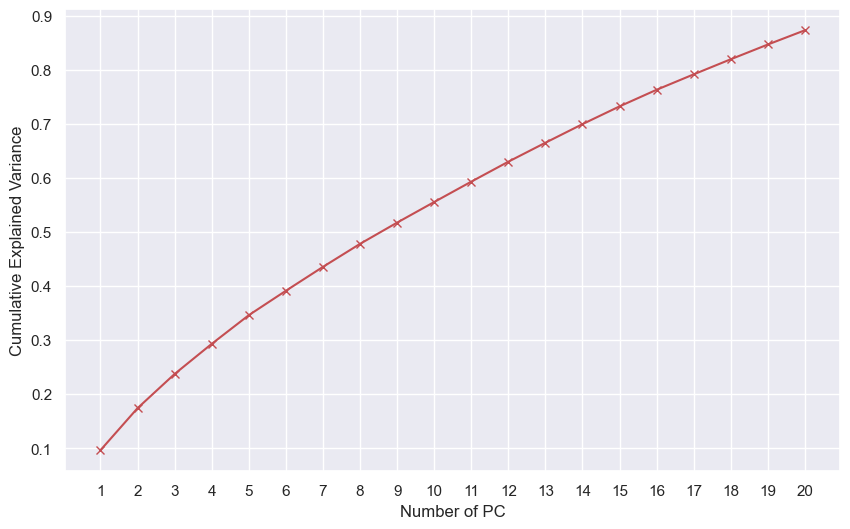

In [153]:
#graph that represents the cumulative variance explained by the different numbers of components
plt.figure(figsize = (10,6))
plt.plot(range(1, 21), sum_variance, "rx-")
plt.xlabel("Number of PC")
plt.ylabel("Cumulative Explained Variance")
plt.xticks(list(range(1, 21)))
plt.show()

In [154]:
#I analyze what happens with only two components
n_components = 2
pca = PCA(n_components = n_components)
principal_components = pca.fit_transform(x)
principal_music_health_df = pd.DataFrame(principal_components, columns = ["PC_" + str(x+1) for x in range(n_components)])
print("explained variance: ", pca.explained_variance_ratio_)

explained variance:  [0.09630846 0.07777759]


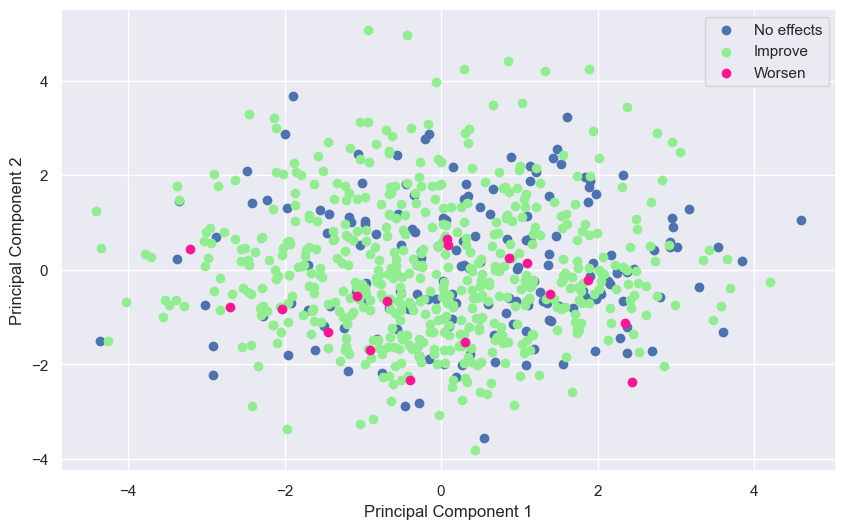

In [155]:
labels = ["No effects", "Improve", "Worsen"]
colors = ["b", "lightgreen", "deeppink"]
plt.figure(figsize = (10,6))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
targets = [0, 1, 2]

#scatter plot for the music effects labels
for t in targets:
  plt.scatter(principal_music_health_df.loc[music_health_df["Music_effects"] == t, "PC_1"], 
  principal_music_health_df.loc[music_health_df["Music_effects"] == t, "PC_2"], label = labels[t], color = colors[t])
plt.legend()
plt.show()

KMeans - Age and hours per day

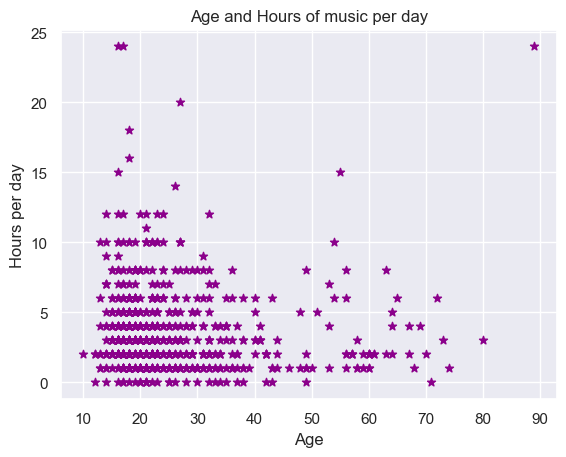

In [156]:
#plot of age and hours per day of music listened
plt.scatter(music_health_df["Age"], music_health_df["Hours_per_day"], c = "darkmagenta", marker = "*")
plt.xlabel("Age")
plt.ylabel("Hours per day")
plt.title("Age and Hours of music per day")
plt.show()

I want to find the clusters in this graph.

In [157]:
from sklearn.cluster import KMeans

square_distances = []
x = music_health_df[["Age", "Hours_per_day"]] #select only the two columns I am interested in
for i in range(1,11):
  km = KMeans(n_clusters = i, n_init = "auto", random_state = 42) #apply KMeans method for a number of clusters that varies from 1 to 10
  km.fit(x)
  square_distances.append(km.inertia_) #create a list of the values of inertia for each number of cluster

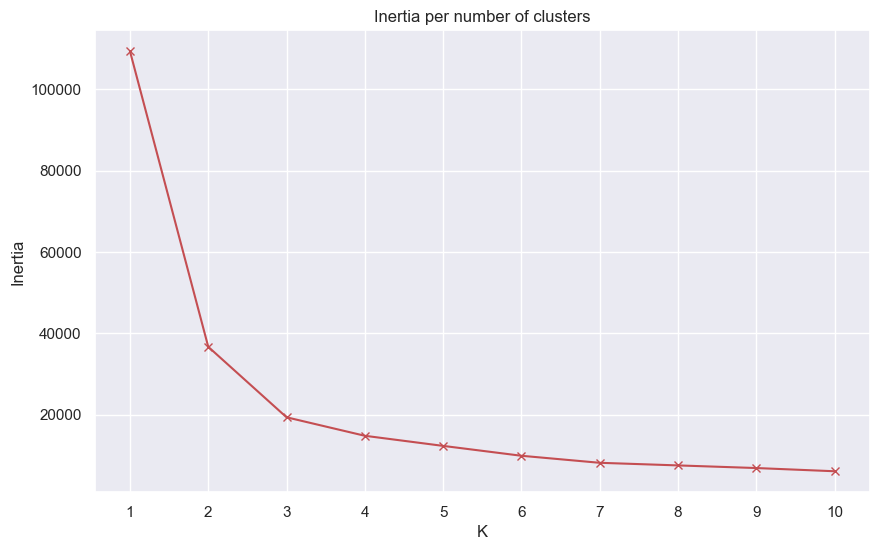

In [158]:
#plot the relationship between the number of clusters and the correspondent value of inertia
plt.figure(figsize = (10,6))
plt.plot(range(1,11), square_distances, "rx-")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Inertia per number of clusters")
plt.xticks(list(range(1,11)))
plt.show()

I choose the value that corresponds to the last elbow: in this case 3. So I need to search for 3 clusters.

In [159]:
km = KMeans(n_clusters = 3, n_init = "auto", random_state = 42)
y_pred = km.fit_predict(x) 
y_pred #each value is the predicted cluster for the points

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0,
       0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0,

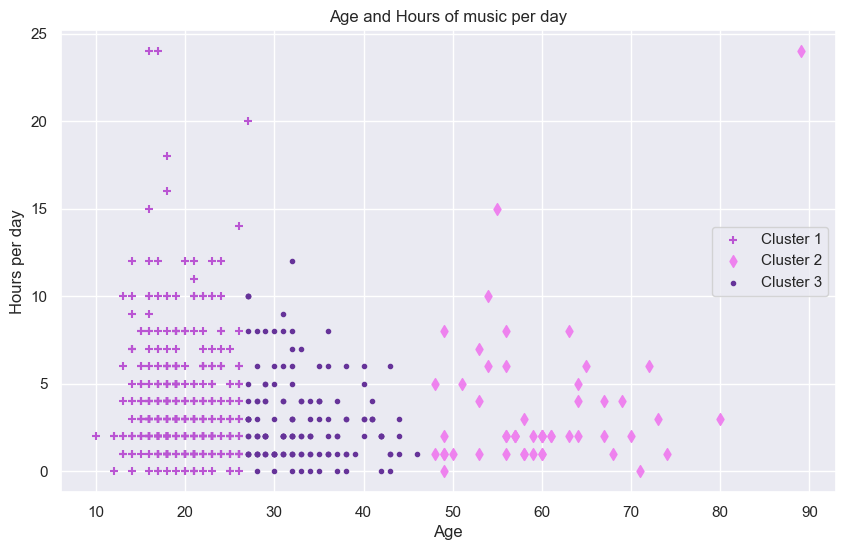

In [160]:
labels = ["Cluster 1", "Cluster 2", "Cluster 3"]
colors = ["mediumorchid", "violet", "rebeccapurple"]
markers = ["+", "d", "."]

#same plot but with division in 3 clusters
plt.figure(figsize = (10,6))
for i in range(3):
  plt.scatter(x.loc[y_pred == i, "Age"], x.loc[y_pred == i, "Hours_per_day"], label = labels[i], c = colors[i], marker = markers[i])
plt.xlabel("Age")
plt.ylabel("Hours per day")
plt.title("Age and Hours of music per day")
plt.legend()
plt.show()